In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("hotel_bookings.csv")

df.head()




,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [3]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [4]:
df["country"]=df["country"].fillna(0)
df["children"]=df["children"].fillna(df["children"].mode()[0])

In [5]:

def arrival_date(data):
    month=data["arrival_date_month"]
    year=data["arrival_date_year"]
    day_of_month=data["arrival_date_day_of_month"]
    date=datetime.datetime.strptime(str(year)+" "+month+" "+str(day_of_month),"%Y %B %d")
    return date
def booking_date(data):
    return data["arrival_date"]-timedelta(data["lead_time"])
def family_or_not(data):
    adult=data["adults"]
    child=data["children"]
    baby=data["babies"]
    if (adult>0) &((child>0)|(baby>0)):
        return 1
    else:
        return 0
def room_type_not_given(data):
    reserved_room=data["reserved_room_type"]
    assigned_room=data["assigned_room_type"]
    if reserved_room==assigned_room:
        return 0
    else: 
        return 1

In [18]:
def feature_eng(data):
    data["arrival_date"]=data.apply(arrival_date,axis=1)
    data["arrival_date_weekday"]=data["arrival_date"].dt.weekday
    data["booking_date"]=data.apply(booking_date,axis=1)
    data["Total_No_Of_Nights_Stayed"]=data["stays_in_weekend_nights"]+data["stays_in_week_nights"]
    data["family_or_not"]=data.apply(family_or_not,axis=1)
    data["total_no_of_people"]=data["adults"]+data["children"]+data["babies"]
    data["room_type_changes"]=data.apply(room_type_not_given,axis=1)
    data["Non_Refund_Flag"]=data["deposit_type"].apply(lambda x:1 if x=="Non Refund" else 0)
    data["days_in_waiting_list_flag"]=data["days_in_waiting_list"].apply(lambda x:0 if x==0 else 1)
    data["adr"]=data["adr"].apply(lambda x:x if x>=0 else data["adr"].median())
    data["missing_features"]=(data==0).sum(axis=1)
    return data

In [19]:
df1=feature_eng(df)

In [20]:
df2=df1.drop(columns=["agent","company","reservation_status_date","arrival_date","booking_date","reservation_status"])

In [30]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'arrival_date_weekday', 'Total_No_Of_Nights_Stayed', 'family_or_not',
       'total_no_of_people', 'room_type_changes', 'Non_Refund_Flag',
       'days_in_waiting_list_flag', 'missing_features'],
      dtype='object')

In [22]:
df_dummies=pd.get_dummies(data=df2,drop_first=True)

In [23]:
y=df_dummies["is_canceled"]
X=df_dummies.drop("is_canceled",axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,recall_score,roc_auc_score

In [25]:
def model_eval(algo,Xtrain,ytrain,Xtest,ytest):
    algo.fit(Xtrain,ytrain)

    y_train_pred=algo.predict(Xtrain)
    y_train_prob=algo.predict_proba(Xtrain)[:,1]
    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report,confusion_matrix
    y_test_pred=algo.predict(Xtest)
    y_test_prob=algo.predict_proba(Xtest)[:,1]
    print(algo)
    print('\n'*1)
    print(' Accuracy score of train: ', accuracy_score(ytrain,y_train_pred))
    print(' Accuracy score of test: ', accuracy_score(ytest,y_test_pred))
    print('\n'*1)
    print(' Confusion Matrix of train: ', confusion_matrix(ytrain,y_train_pred))
    print(' Confusion Matrix of test: ', confusion_matrix(ytest,y_test_pred))
    print('\n'*1)
    print(' Auc of train: ', roc_auc_score(ytrain,y_train_prob))
    print(' Auc of test: ', roc_auc_score(ytest,y_test_prob))

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtc=DecisionTreeClassifier(max_depth=10)

In [28]:
model_eval(dtc,X_train,y_train,X_test,y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


 Accuracy score of train:  0.9632058200615031
 Accuracy score of test:  0.9613312114359103


 Confusion Matrix of train:  [[51262  1426]
 [ 1649 29236]]
 Confusion Matrix of test:  [[21798   680]
 [  705 12634]]


 Auc of train:  0.9945236226111569
 Auc of test:  0.9913463762063415


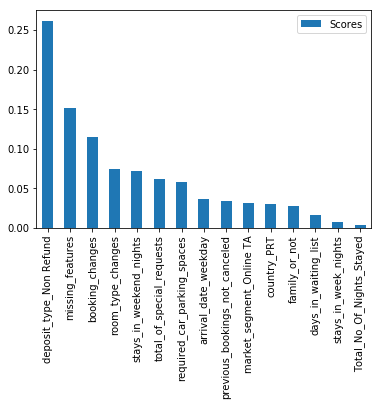

In [29]:
pd.DataFrame(index=X.columns,data=dtc.feature_importances_,columns=["Scores"]).sort_values("Scores",ascending=False)[:15].plot.bar()